In [39]:
import pandas as pd
import numpy as np
import sklearn 
import plotly.express as px

np.random.seed(42)
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Get the Data
___

In [40]:
diabetes_data = pd.read_csv("diabetes.csv")

## Take a quick look at the structure

In [41]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
diabetes_data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [43]:
diabetes_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

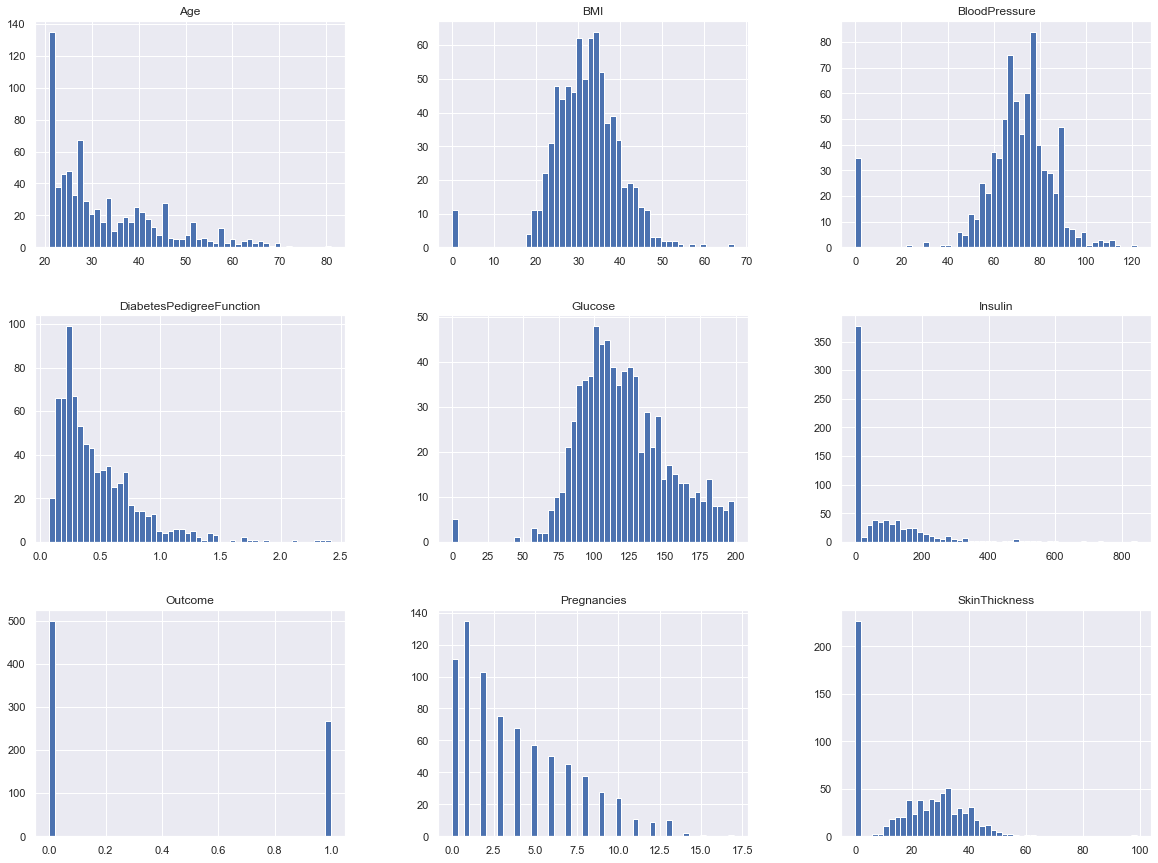

In [44]:
p = diabetes_data.hist(bins=50, figsize=(20,15))

__Some value are set to 0 and look weird__ 

 1. skinthickness
 2. glucose
 3. bloodPressure
 4. insulin
 5. BMI
 
 
→ __`Glucose`, `Blood pressure`, `SkinThickness`, `BMI`  can't be 0__ 

#### Can insulin level be zero?
__YES__, a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn't go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes.

In [45]:
# replace zero values by NaN 
outliers_columns = ['BloodPressure', 'BMI', 'Glucose']
 
diabetes_data[outliers_columns] = diabetes_data[outliers_columns].replace(0, np.NaN)

# replace nan with the median
diabetes_data[outliers_columns] = diabetes_data[outliers_columns].fillna(diabetes_data[outliers_columns].median())

### Plotting after Nan removal

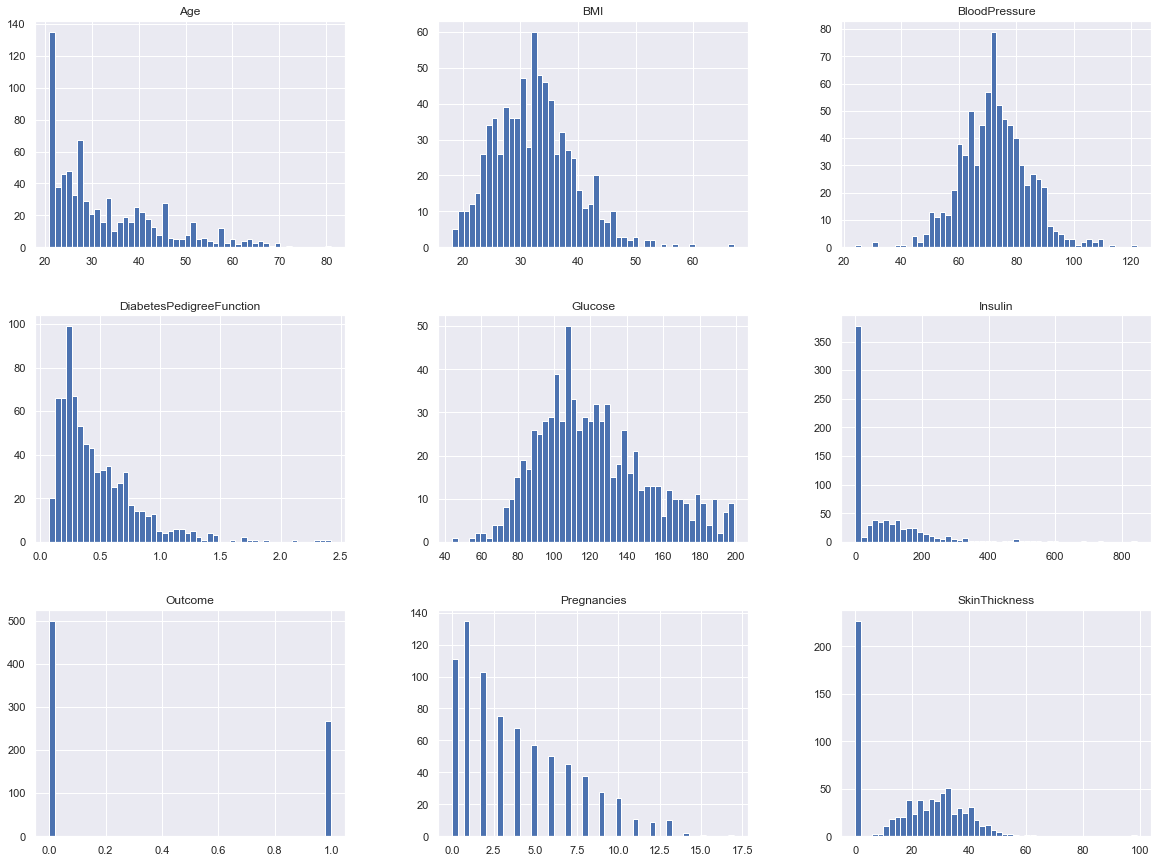

In [46]:
p = diabetes_data.hist(bins=50, figsize=(20,15))

## Create a Test Set
__To garentee that the test set is representative of the overall population we will use _statified sampling_.__

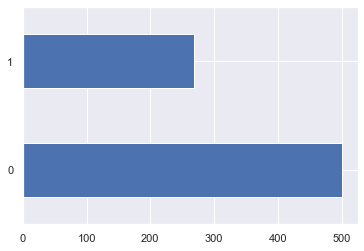

In [47]:
# Target 
p = diabetes_data['Outcome'].value_counts().plot.barh()

Proportion of people without the dease (0) is more than 2 times bigger than people witht the dease


As the dataset is small and the target do not contains the same proportion of people with the diabete and without. When spliting the data __we run the risk of in troduicng a significant sampling bias__. 

## Create a Test Set
__To garentee that the test set is representative of the overall population we will use _statified sampling_.__

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for X_index, y_index in split.split(diabetes_data, diabetes_data["Outcome"]):
    train_set = diabetes_data.loc[X_index]
    test_set = diabetes_data.loc[y_index]

# 2. Explore the data
---

### What is Diabetes?
__Diabetes__ is a disease that occurs when your __blood glucose__, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. __Insulin__, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

In [49]:
diabetes_data_copy = train_set.copy()

## 2.1 Study each attribute and its characteristics 

- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, logarithmic, etc)
- Possibly usefull for the task?
- Type of distribution (Gaussian, uniform, logarithmic, etc)


### Features
- __Pregnancies__, categorical data with 17 stages. What this stages means?
- __Glucose__, Plasma glucose concentration a 2 hours in an oral glucose tolerance test, integer range between 0 to 199, normal distribution with possible outliers in 0
- __BloodPresure__, diastolic blood pressure integers between 0 to 122 (mm Hg) normal distribution with possible outliers in 0 
- __SkinThickness__, integer between 0 to 63 mm, normal distribution with possible outliers in 0
- __Insulin__, 2-Hour serum insulin integer between 0 to 846 mu U/ml, with possible outliers in 0
- __BMI__, Body mass index, floats between0 to 97 $(kg/m^2)$ (possible outliers in 0), normal distribution with possible outliers in 0
    - BMI < 18.5, underweight
    - 18.5 < BMI <25, normal
    - 25.0 < BMI <30, overweight
    - BMI >30.0, obese
- __Age__, integers between 21 to 81 logarithmic distribution
- __DiabetesPedigreeFunction__, a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history, float between 0.08 to 2.42

### Target
- __Outcome__, boolean with 0 means no diabete, 1 diabete --> 34% diabetes in this sample 

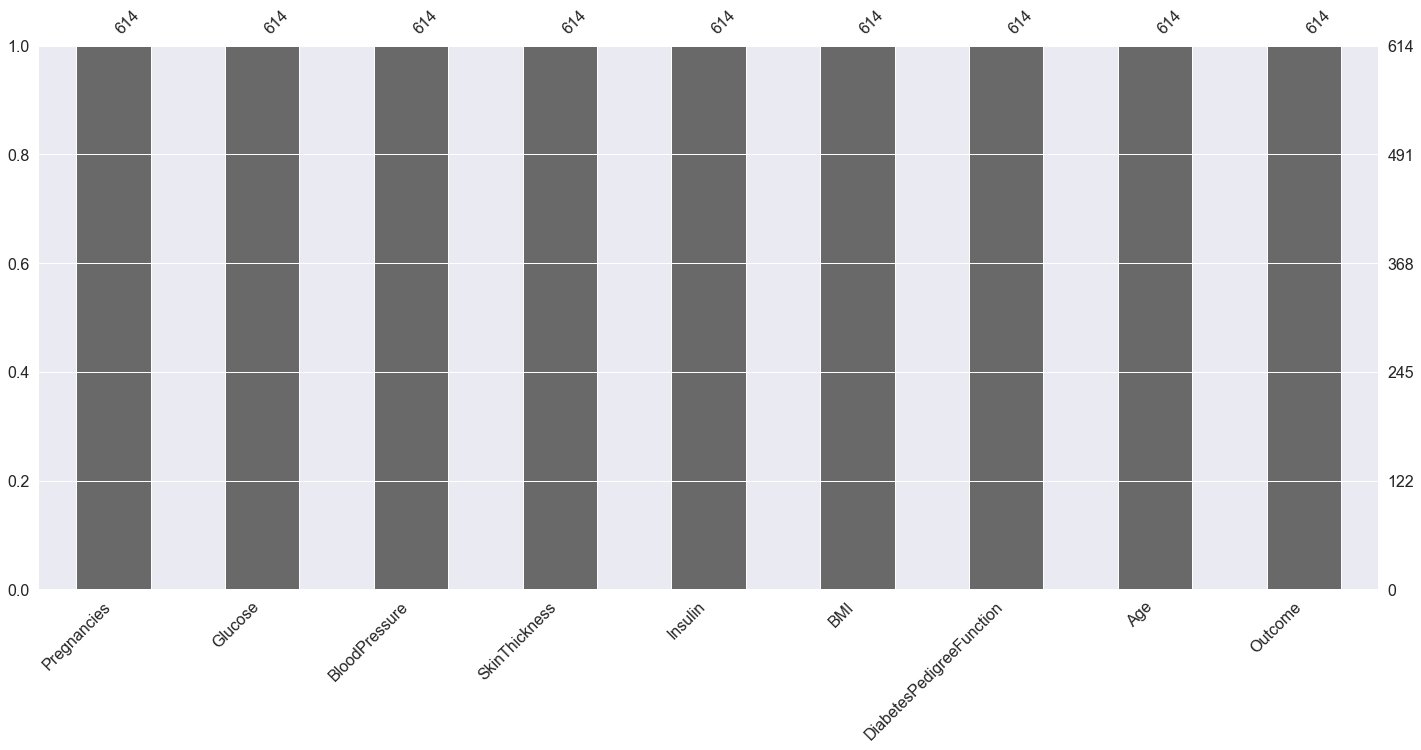

In [50]:
## Null count analysis 
import missingno as msno
p = msno.bar(diabetes_data_copy)

### Zero missing values

In [51]:
(diabetes_data_copy == 0).sum()

Pregnancies                  85
Glucose                       0
BloodPressure                 0
SkinThickness               175
Insulin                     290
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     400
dtype: int64

- __Glucose__ seems to be the most important parameters 
- People with a low __BMI__, under 23 is not touch by the disease

## 2.2 Looking for Correlation

In [52]:
corr_matrix = diabetes_data_copy.corr()

In [53]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.512291
BMI                         0.328830
Age                         0.240676
Pregnancies                 0.208173
BloodPressure               0.183373
DiabetesPedigreeFunction    0.165312
Insulin                     0.164197
SkinThickness               0.093789
Name: Outcome, dtype: float64

<div class="alert alert-block alert-info">
<b>Interpretation</b>
    <ul>
        <li>best attributes, Glucose, BMI and Age</li>
        <li>we may delete the skin thickness atributes because it's not realy correlated and we have a lot of missing values</li>
    </ul>
</div>

In [54]:
# delete SkinThickness
diabetes_data_copy.drop("SkinThickness", axis=1, inplace=True, errors="ignore")

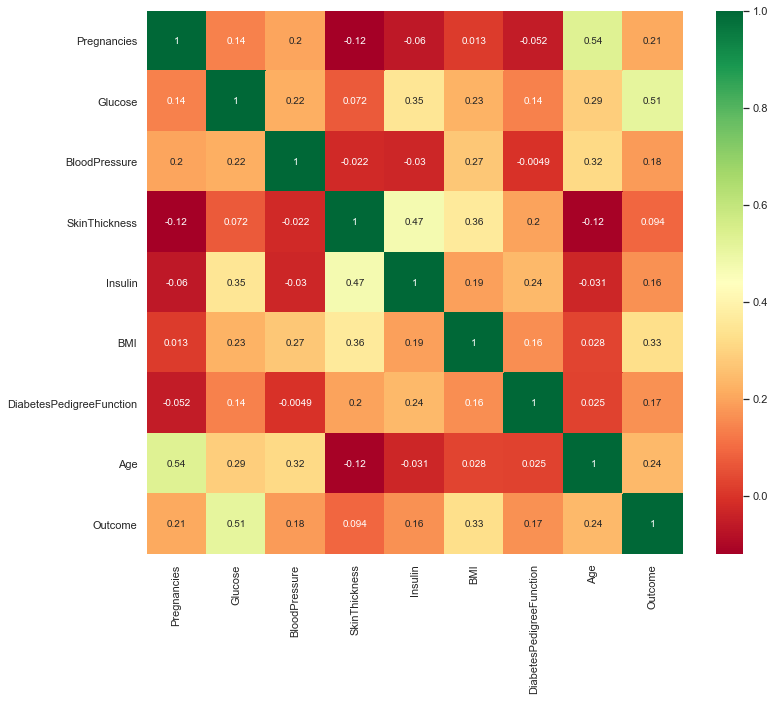

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
p = sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

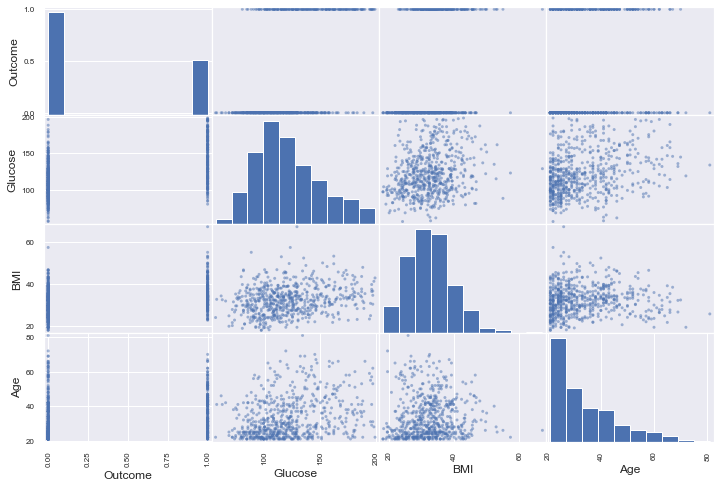

In [56]:
from pandas.plotting import scatter_matrix
attributes = ['Outcome', 'Glucose', 'BMI', 'Age']
p = scatter_matrix(diabetes_data_copy[attributes], figsize=(12,8))

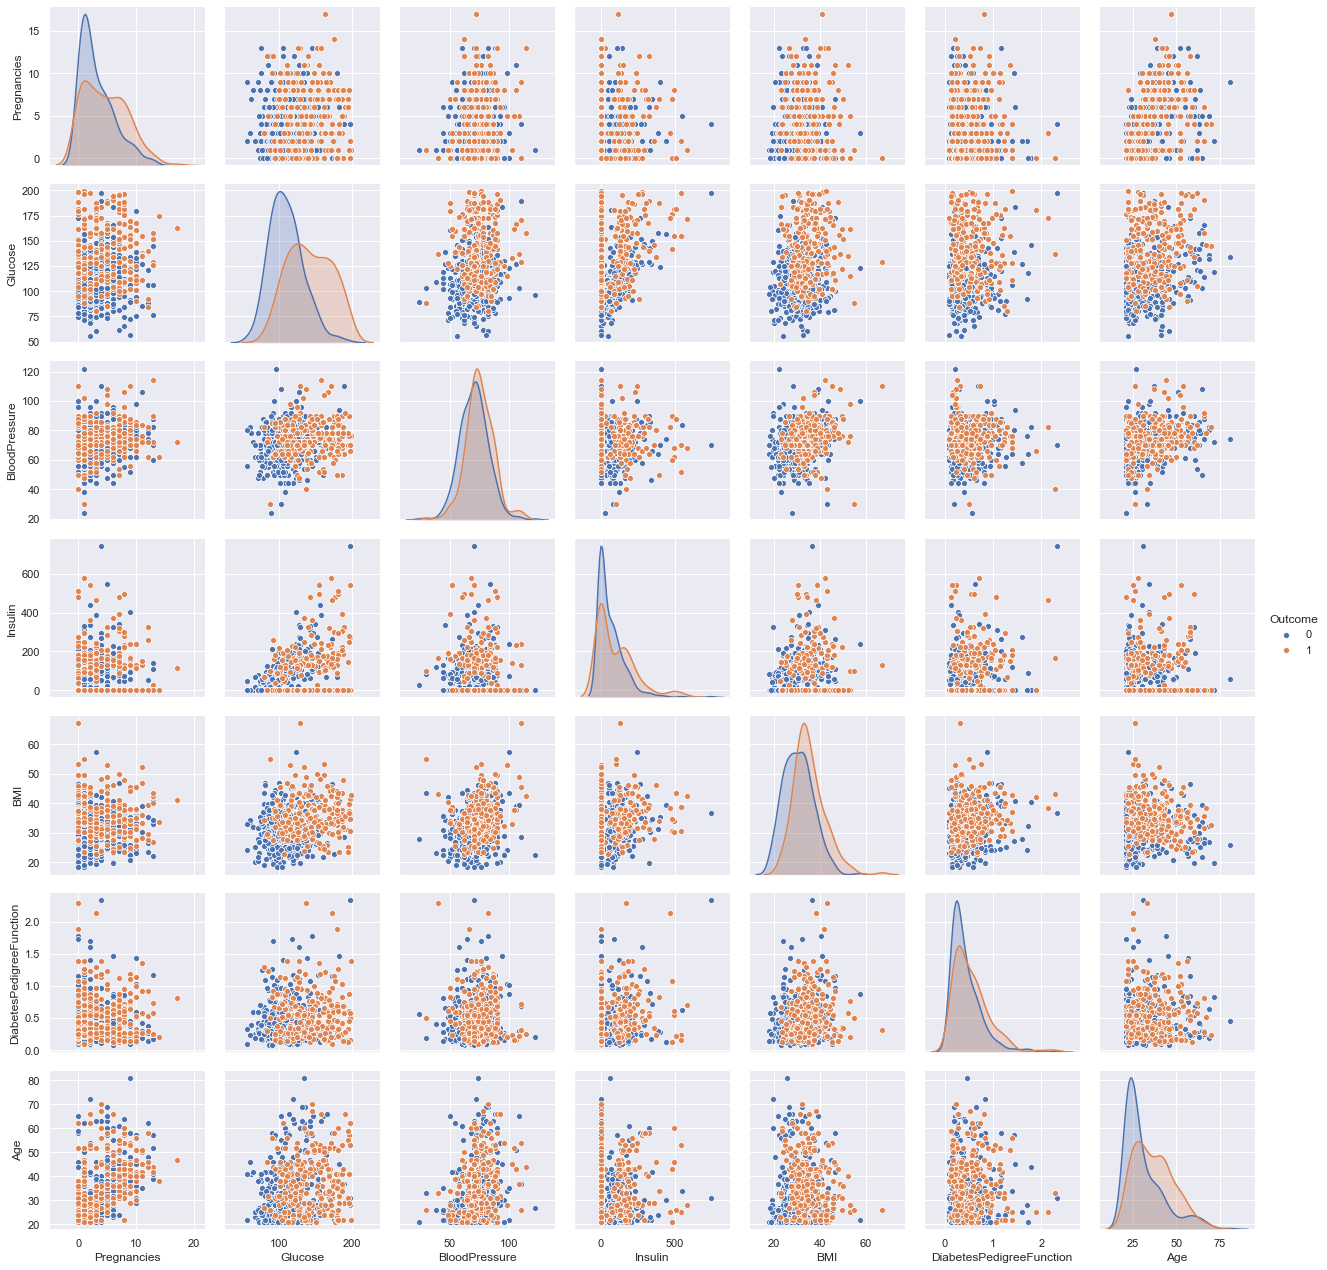

In [57]:
p = sns.pairplot(diabetes_data_copy, hue="Outcome")

↳ hight correlation with glucosse

## Experimenting with attribute combination

In [58]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.512291
BMI                         0.328830
Age                         0.240676
Pregnancies                 0.208173
BloodPressure               0.183373
DiabetesPedigreeFunction    0.165312
Insulin                     0.164197
SkinThickness               0.093789
Name: Outcome, dtype: float64

### Features aggregation

In [59]:
diabetes_data_copy['Glucose_per_BMI'] = diabetes_data_copy['Glucose'] / diabetes_data_copy['BMI']
diabetes_data_copy['Insulin_per_Glucose'] = diabetes_data_copy['Insulin'] / diabetes_data_copy['Glucose']

    1. underweight → BMI < 18.5      
    2. normal      → 18.5 < BMI < 25
    3. overweight  → 25.0 < BMI < 30
    4. obese       → BMI > 30.0

### Discretization

In [60]:
# discrete BMI
bins = [-1,18.5,25,30, np.inf]
cats = pd.cut(diabetes_data_copy['BMI'], bins)
diabetes_data_copy['cats_BMI'] = cats.values.codes

In [61]:
corr_matrix = diabetes_data_copy.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.512291
BMI                         0.328830
cats_BMI                    0.299845
Age                         0.240676
Pregnancies                 0.208173
Glucose_per_BMI             0.185930
BloodPressure               0.183373
DiabetesPedigreeFunction    0.165312
Insulin                     0.164197
Insulin_per_Glucose         0.085351
Name: Outcome, dtype: float64

↳ __Transforming BMI in cats augment is correlation with the target__. The 2 features aggregation are not really relevant 

# 3. Prepare the Data 
---

In [62]:
X = train_set.drop("Outcome", axis=1)
y = train_set["Outcome"]

## Custom transformer
↳ embed data cleaning step in sklearn function

In [63]:
from sklearn.preprocessing import FunctionTransformer

1. __Get rid of the attributes SkinThcikness__
<p>↳ A lot of outliers and not to much correlation between this attributes and the targets 

In [64]:
def feature_select(df, drop_col=['SkinThickness'], action=True):
    if action:
        return df.drop(drop_col, axis=1, errors='ignore')
    else:
        return df

# test
select_features = FunctionTransformer(feature_select, kw_args={"action": True})
# select_features.transform(X)

2. __Fill with median outliers in `Glucose`, `BloodPressure` and `BMI`__

In [65]:
from sklearn.impute import SimpleImputer

# transformer which will 
imputer = SimpleImputer(strategy="median")

3. __Discretize BMI__

In [66]:
bins = [-1,18.5,25,30, np.inf]

def disc_bmi(df, buckets=bins, discretize=True):
    if discretize:
        cats = pd.cut(df['BMI'], bins)
        df['BMI'] = cats.values.codes
        return df
    else:
        return df  

# test
discrete_BMI = FunctionTransformer(disc_bmi, kw_args={"discretize": True})
# discrete_BMI.transform(X1)

## Transform Pipelines

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

pd.options.mode.chained_assignment = None  # default='warn'

### Pipeline process
1. Feature selection
2. Filling Nan with median
3. discretize BMI
4. Standardization

In [68]:
pipeline = Pipeline([
    ('feature_select', FunctionTransformer(
        feature_select,
        kw_args={"action": True, "drop_col":["SkinThickness", "Pregnancies"]}
    )),
#     ("imputer", imputer),
    ('discrete_BMI', FunctionTransformer(disc_bmi, kw_args={"discretize": True})),
    ('std_scaler', StandardScaler())
])

X_prepared = pipeline.fit_transform(X)

# 4. Short-List Promising Model
---
We will collect `accuracy` and `ROC AUC` scores for each model

In [174]:
from sklearn.model_selection import cross_validate, cross_val_score

scoring = ["accuracy", "roc_auc"]

In [175]:
def display_scores(scores):
    confidence_itv = [scores.mean() - 3 * scores.std(), scores.mean() + 3 * scores.std()]
    print(f"Scores :{scores}")
    print("")
    print(f"Mean: {scores.mean()}")
    print(f"95% intervals: {confidence_itv}")

In [257]:
class table_score():
    
    def __init__(self,scoring):
        self.measures = scoring
        self.columns = {name:[] for name in scoring}
        self.table = pd.DataFrame(self.columns.update({"models":[]}))
    
    def collect_scores(self, name, scores):
        data = {measure: scores[f"test_{measure}"] for measure in self.measures}
        data["models"] = [name] * len(scores_linearSVC["fit_time"])
        df = pd.DataFrame(data)
        self.table = pd.concat([self.table, df])
        self.table.drop_duplicates(inplace=True) # just in case we run two time the same algo  
        
    def plot(self):
        for measure in self.measures:
            fig = px.box(self.table, y=measure, color="models", points="all")
            fig.show()

In [258]:
summary = table_score(scoring)

## Baseline model
↳ set all prediction to 0

In [259]:
## cross validate do not work for custom baseline model (TO FIX)

In [260]:
from sklearn.base import BaseEstimator

class NeverTrueClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros(len(X))

In [261]:
baseline_clf = NeverTrueClassifier()
scores_baseline = cross_val_score(baseline_clf, X_prepared, y, scoring="accuracy", cv=10)
display_scores(scores_baseline)

Scores :[0.61290323 0.66129032 0.70967742 0.67741935 0.62295082 0.62295082
 0.68852459 0.62295082 0.6557377  0.63934426]

Mean: 0.6513749338974087
95% intervals: [0.5583094527810954, 0.744440415013722]


## Train many quick and dirty model from different categories 
- [x] SGD
- [x] linear SVC
- KNeighbors Classifiers
- [x] SVC 
- ensemble model (Random Forest)

### A. Stochastic Gradient Descent (SGD)

In [262]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_prepared, y)
scores_sgd = cross_validate(sgd_clf, X_prepared, y, scoring=scoring, cv=10)
summary.collect_scores("SGD", scores_sgd)

### B. Linear SVC

In [263]:
from sklearn.svm import LinearSVC

linearSVC_clf = LinearSVC(random_state=42, max_iter=5000)
# linearSVC_clf.fit(X_prepared, y)
scores_linearSVC = cross_validate(linearSVC_clf, X_prepared, y, scoring=scoring, cv=10)
summary.collect_scores("linear_SVC", scores_linearSVC)

### C. KNeighbors Classifier

### D. SVC

In [264]:
from sklearn.svm import SVC
np.random.seed(42)

SVC_clf = SVC(kernel="poly", degree=3, coef0=2, C=5)
scores_SVC = cross_validate(SVC_clf, X_prepared, y, scoring=scoring, cv=10)
summary.collect_scores("SVC", scores_SVC)

In [266]:
summary.plot()

### E.  Ensemble model

---
## Performance measures
how to choose a good classifier? Is Accuracy a good metrics?

In [82]:
from sklearn.model_selection import cross_val_predict
np.random.seed(42)

y_train_pred = cross_val_predict(sgd_clf, X_prepared, y, cv=10)

#### confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_train_pred)

array([[316,  84],
       [ 82, 132]])

__Our goal is to find a predictor with a high Recall score__. That mean we are looking in a predictor with a hight ratio on detecting people with diabetes. 


_↳ We favor predictor with a hight detection score for people with the diabetes than a great accuracy of the poositive prediction_

#### Recall

In [84]:
from sklearn.metrics import recall_score

recall_score(y, y_train_pred)

0.616822429906542

In [85]:
### regular threshold to 0
y_scores = sgd_clf.decision_function(X_prepared[:5])
print("Predict the 5 first digits")
print("--------------------------")
print(f"y scores: {y_scores}")
print(f"predictions: {sgd_clf.predict(X_prepared[:5])}")

Predict the 5 first digits
--------------------------
y scores: [-6.02049384 -0.03282465 -4.20286586 -1.36695397 -4.79123471]
predictions: [0 0 0 0 0]


In [86]:
threshold = -1.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False,  True, False,  True, False])

How do we decide the threshold ?

In [87]:
np.random.seed(42)
y_scores = cross_val_predict(sgd_clf, X_prepared, y, method="decision_function", cv=3)

In [88]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

In [89]:
def plot_precision_recall(precisions, recalls, thresholds):
    df = pd.DataFrame({'precisions':precisions[:-1], 'recalls':recalls[:-1], 'thresholds':thresholds})
    df = pd.melt(df, id_vars='thresholds', value_vars=['recalls', 'precisions'])
    fig = px.line(df,x='thresholds', y='value', color="variable" )
    fig.update_layout(hovermode="x unified")
    fig.update_traces(hovertemplate="%{y}")
    return fig

In [90]:
df = pd.DataFrame({'precisions':precisions[:-1], 'recalls':recalls[:-1], 'thresholds':thresholds})
df = pd.melt(df, id_vars='thresholds', value_vars=['recalls', 'precisions'])
df[df['variable'] == 'precisions']

thresholds    variable     value
613   -11.580162  precisions  0.349103
614   -11.196527  precisions  0.348039
615   -10.995870  precisions  0.348609
616   -10.705031  precisions  0.349180
617   -10.459415  precisions  0.349754
...          ...         ...       ...
1221    8.425704  precisions  0.800000
1222    8.625519  precisions  0.750000
1223    8.717165  precisions  0.666667
1224    9.071834  precisions  0.500000
1225    9.901650  precisions  0.000000

[613 rows x 3 columns]

In [91]:
plot_precision_recall(precisions, recalls, thresholds)

↳ With this predictor and a __thresholds of -15__ we can get a recalls of 99% with 34 % of precisions

In [92]:
y_train_pred_99 = (y_scores > -10)

### ROC curve

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

In [94]:
def create_df(fpr, tpr, thresholds, name):
    df = pd.DataFrame({'False Positive Rate':fpr, 
                       'True Positive Rate':tpr, 
                       'thresholds':thresholds,
                      'classifier':[name]*len(fpr)})
    return df

def plot_roc_curve(df):
    return px.line(df, 
                   x='False Positive Rate', 
                   y='True Positive Rate', 
                   color = 'classifier',
                   hover_data=['thresholds'])

In [95]:
summary = create_df(fpr, tpr, thresholds, "SGD")
plot_roc_curve(summary)

In [96]:
### We will use the ROC curve as a performances measure
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores)

0.7387032710280373

### Let's compare it with a `Random Forest Classifier`

In [97]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(41)

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_prepared, y, cv=3, method="predict_proba")

In [98]:
y_scores_forest = y_probas_forest[:,-1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, y_scores_forest)
df = create_df(fpr_forest, tpr_forest, thresholds_forest, "RandomForest")

def add_clf_to_summary(df):
    return pd.concat([summary,df])

summary = add_clf_to_summary(df)

In [99]:
plot_roc_curve(summary)

In [100]:
# forest ROC AREA
roc_auc_score(y, y_scores_forest)

0.8130490654205607